In [1]:
#Imports for CCD
from osgeo import gdal
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
import numpy as np
%matplotlib inline
import ccd



In [2]:
#Inputs 1
pixel_x1 =11
pixel_y1 =29
data1='fusion'
sample_size1=30
nth1=1

parent_dir1='/Users/arthur.platel/Desktop/Fusion_Images/CZU_FireV2'


In [3]:
# Input 2
pixel_x2 =36
pixel_y2 =54
data2='force'
sample_size2=30
nth2=1
parent_dir2='/Users/arthur.platel/Desktop/Fusion_Images/CZU_FireV2/Force_ALL'

In [4]:
from ccd import data_input

#import data from images
data1 = data_input.get_data(parent_dir1,pixel_x1,pixel_y1,sample_size1,nth1,d=data1)
dates, blues, greens, reds, nirs, ndvis, ndwis, qas = data1

data2 = data_input.get_data(parent_dir2,pixel_x2,pixel_y2,sample_size2,nth2,d
=data2)
dates2, blues2, greens2, reds2, nirs2, ndvis2, ndwis2, qas2 = data2

params = {'QA_BITPACKED': False,
              'QA_FILL': 255,
              'QA_CLEAR': 0,
              'QA_WATER': 1,
              'QA_SHADOW': 2,
              'QA_SNOW': 3,
              'QA_CLOUD': 4}


images used: 1278
images used: 380


In [5]:
#calculate results using ccd
results1 = ccd.detect(dates, blues, greens, reds, nirs, ndvis, ndwis, qas, params)
results2 = ccd.detect(dates2, blues2, greens2, reds2, nirs2, ndvis2, ndwis2, qas2, params)



In [6]:
#print CCD output
for seq in results1["change_models"]:
    print('break day',seq['break_day'])

for seq in results2["change_models"]:
    print('break day',seq['break_day'])
  



break day 737654
break day 737972
break day 737724
break day 737969


blue
green
red
nir
ndvi


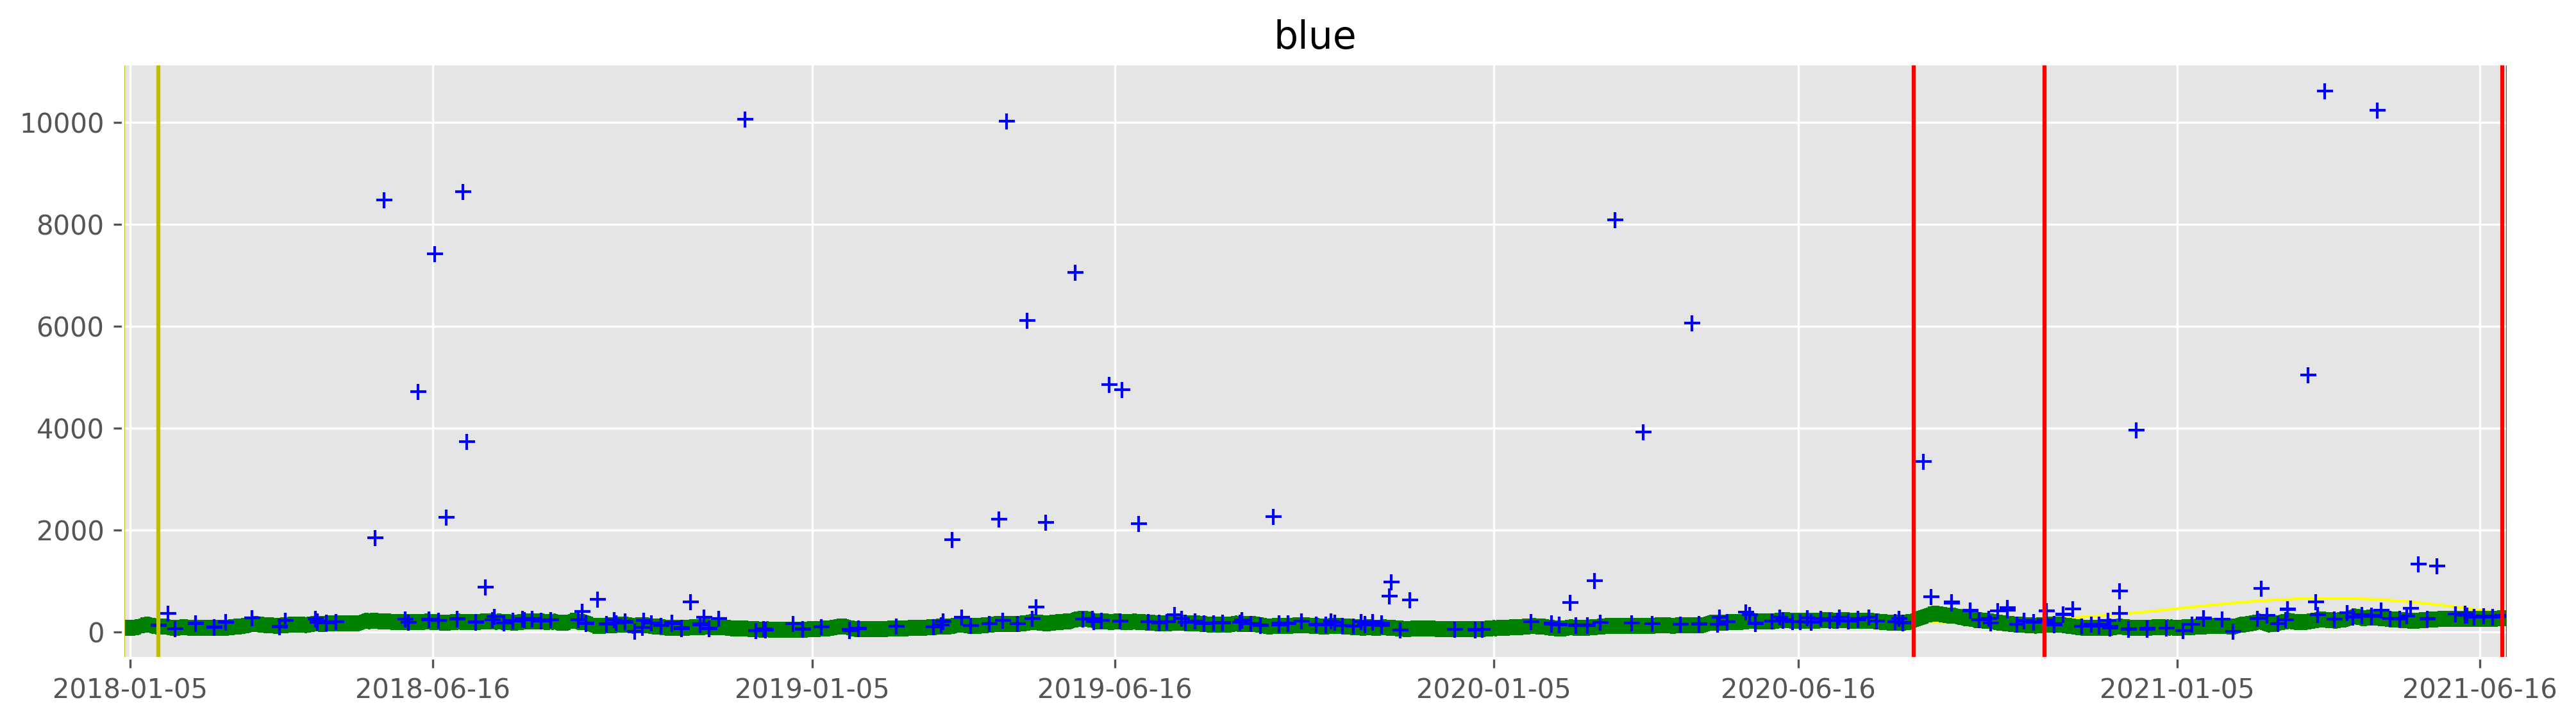

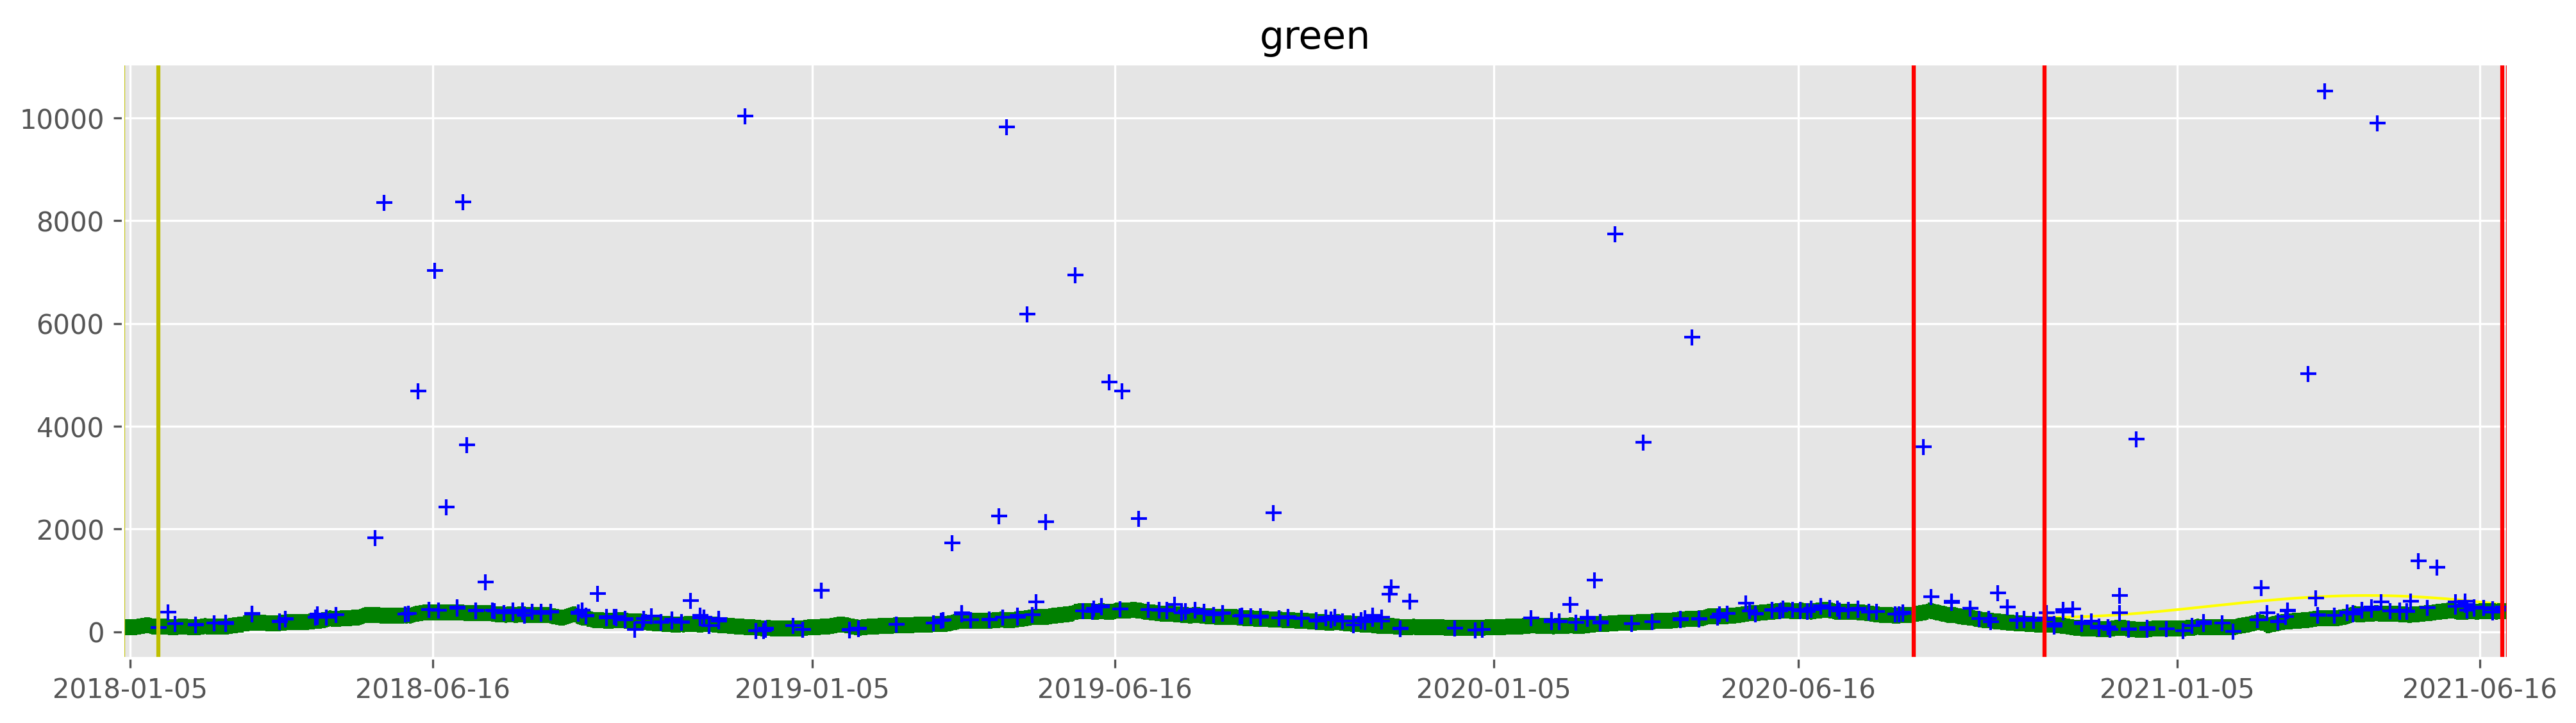

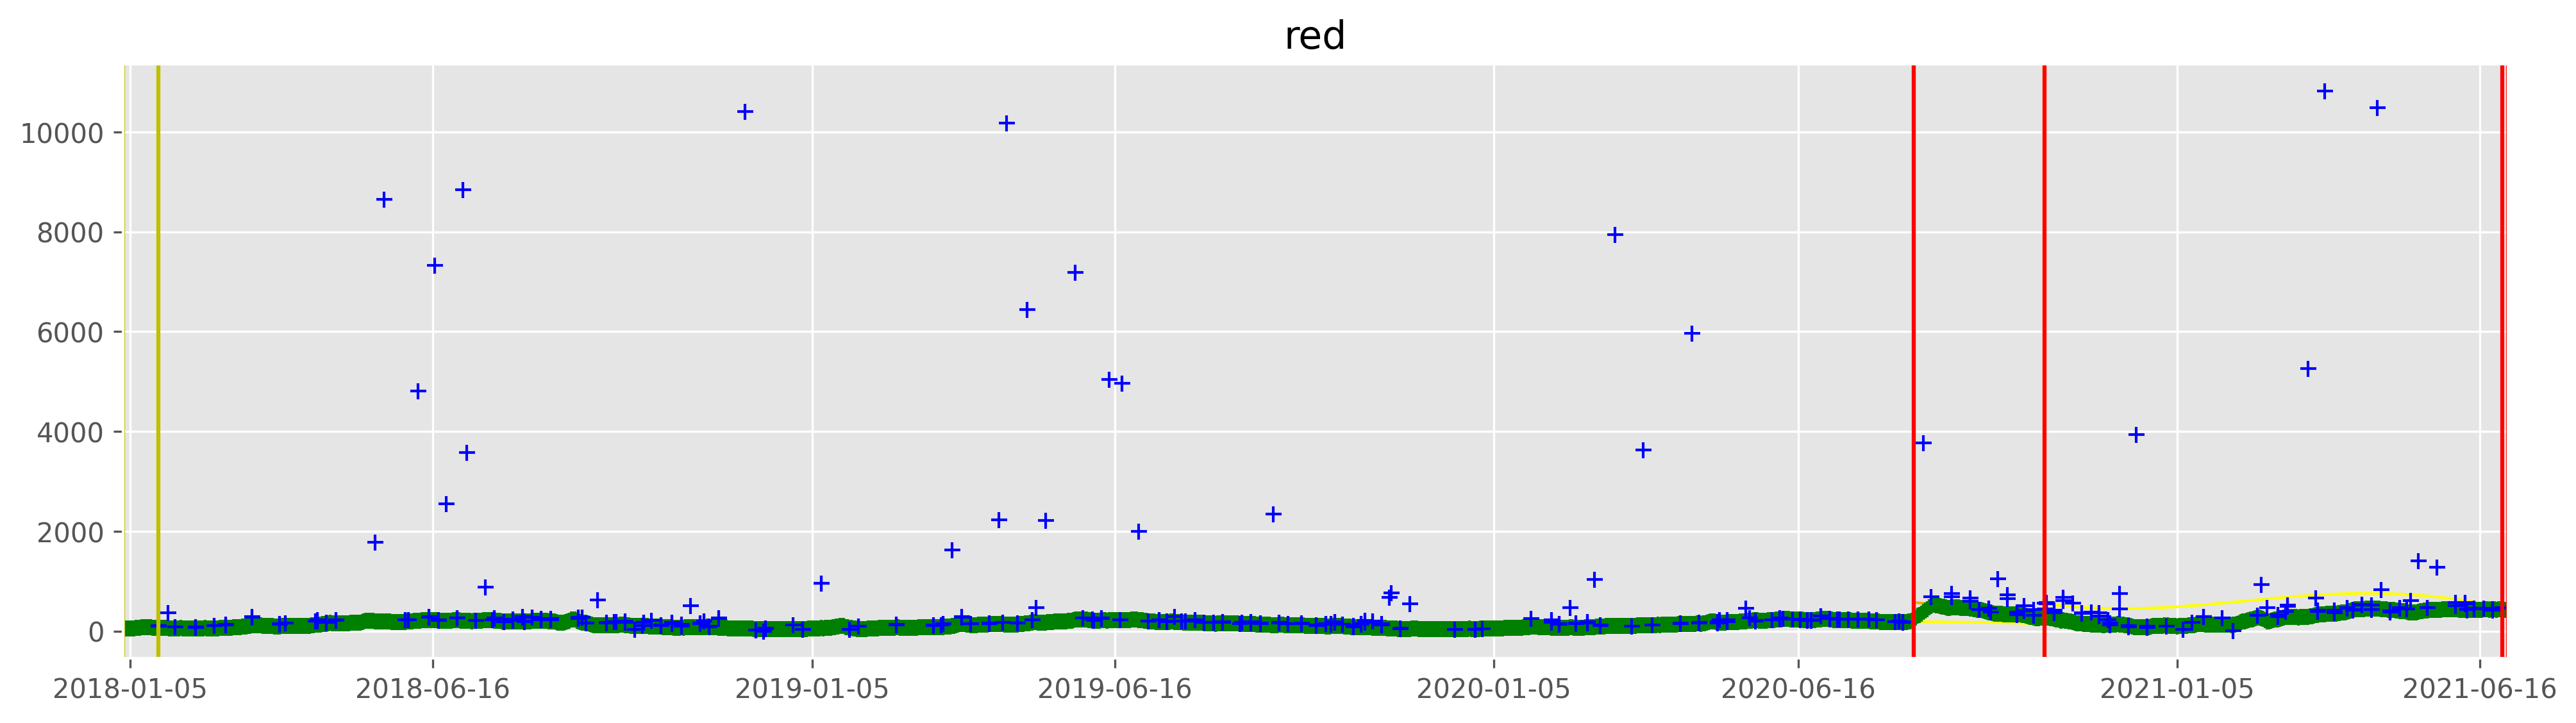

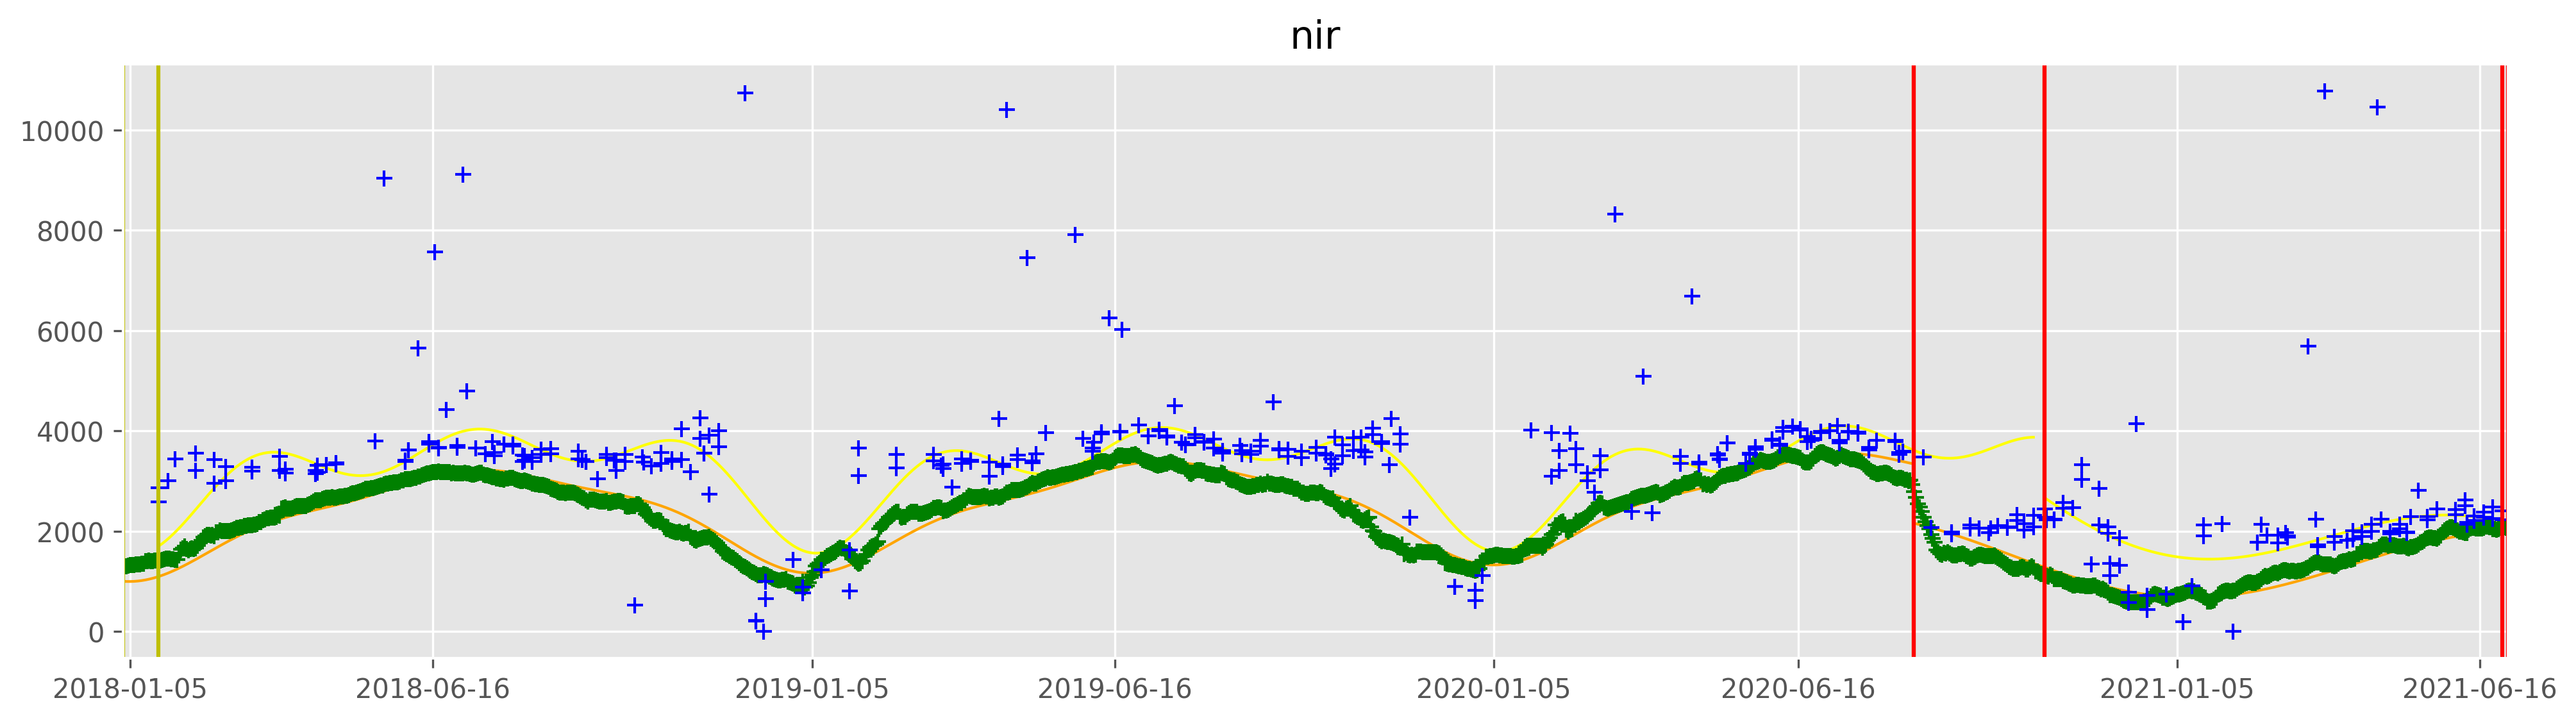

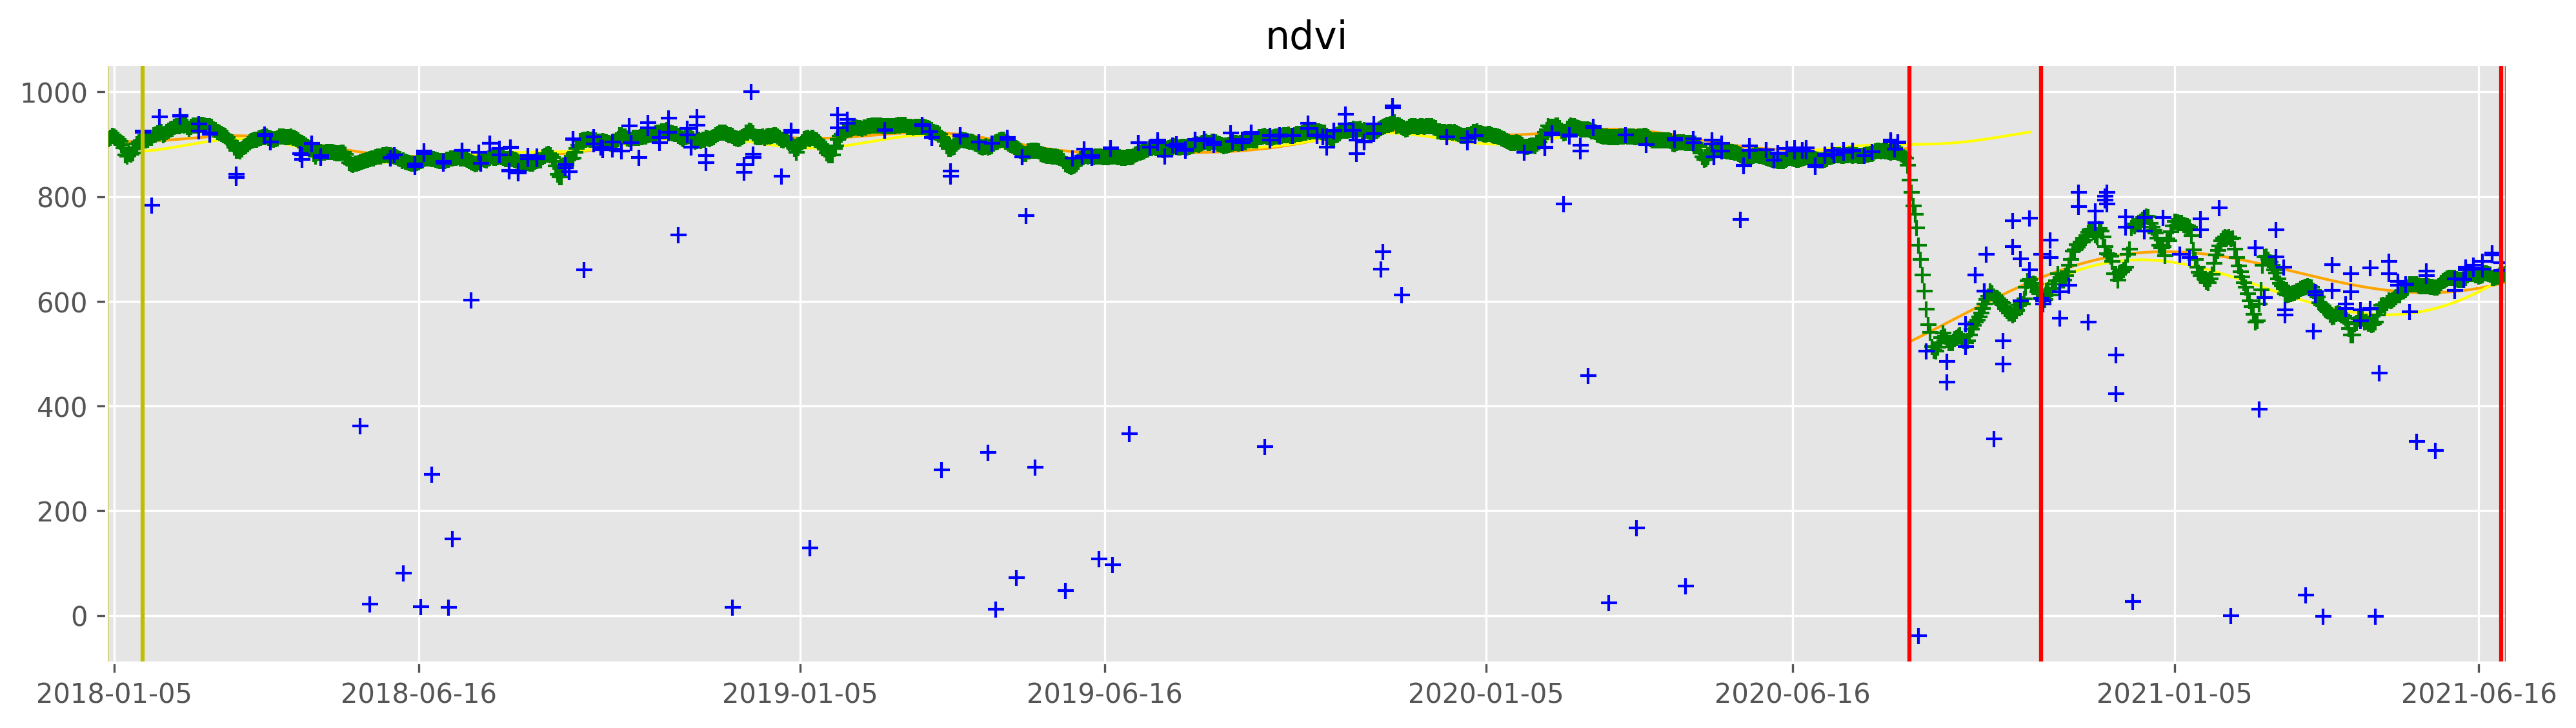

In [19]:
#Plot Results
def plot(band,bands1,bands2,results1,results2,dates,dates2):
    predicted_values = []
    prediction_dates = []
    break_dates = []
    start_dates = []
    mask = np.array(results1['processing_mask'], dtype=bool)
    new_dates=[]
    dates3=[]
    for k in dates:
        if (date.fromordinal(int(k)).day==16 and date.fromordinal(int(k)).month)==6 or (date.fromordinal(int(k)).day==5 and date.fromordinal(int(k)).month==1) :
            dates3.append(k);
            new_dates.append(str(date.fromordinal(int(k))))

    for num, result in enumerate(results1['change_models']):
        days = np.arange(result['start_day'], result['end_day'] + 1)
        prediction_dates.append(days)
        break_dates.append(result['break_day'])
        start_dates.append(result['start_day'])
        
        intercept = result[band]['intercept']
        coef = result[band]['coefficients']
        
        predicted_values.append(intercept + coef[0] * days +
                                coef[1]*np.cos(days*1*2*np.pi/365.25) + coef[2]*np.sin(days*1*2*np.pi/365.25) +
                                coef[3]*np.cos(days*2*2*np.pi/365.25) + coef[4]*np.sin(days*2*2*np.pi/365.25) +
                                coef[5]*np.cos(days*3*2*np.pi/365.25) + coef[6]*np.sin(days*3*2*np.pi/365.25))
         
    predicted_values2 = []
    prediction_dates2 = []
    break_dates2 = []
    start_dates2 = []
    mask2 = np.array(results2['processing_mask'], dtype=bool)
    new_dates2=[]
    dates22=[]
    for k in dates:
        if (date.fromordinal(int(k)).day==16 and date.fromordinal(int(k)).month)==6 or (date.fromordinal(int(k)).day==5 and date.fromordinal(int(k)).month==1) :
            dates22.append(k)
            new_dates2.append(str(date.fromordinal(int(k))))

    for num, result in enumerate(results2['change_models']):
        days = np.arange(result['start_day'], result['end_day'] + 1)
        prediction_dates2.append(days)
        break_dates2.append(result['break_day'])
        start_dates2.append(result['start_day'])
        
        intercept2 = result[band]['intercept']
        coef2 = result[band]['coefficients']
        
        predicted_values2.append(intercept2 + coef2[0] * days +
                                coef2[1]*np.cos(days*1*2*np.pi/365.25) + coef2[2]*np.sin(days*1*2*np.pi/365.25) +
                                coef2[3]*np.cos(days*2*2*np.pi/365.25) + coef2[4]*np.sin(days*2*2*np.pi/365.25) +
                                coef2[5]*np.cos(days*3*2*np.pi/365.25) + coef2[6]*np.sin(days*3*2*np.pi/365.25))  
    plt.style.use('ggplot')
    fg = plt.figure(figsize=(16,9), dpi=300)
    #Removed y-axis value, but can standardize later
    print(band)
    if band=='ndvi':
        a1 = fg.add_subplot(2, 1, 1, xlim=(min(dates), max(dates)))   
    elif band=='nir':
        a1 = fg.add_subplot(2, 1, 1, xlim=(min(dates), max(dates)))
    else:
        a1 = fg.add_subplot(2, 1, 1, xlim=(min(dates), max(dates)))
    #Plot Model Fits
    for _preddate, _predvalue in zip(prediction_dates, predicted_values):
        a1.plot(_preddate, _predvalue, 'orange', linewidth=1)
    for _preddate2, _predvalue2 in zip(prediction_dates2, predicted_values2):
        a1.plot(_preddate2, _predvalue2, 'yellow', linewidth=1)

    
    

    a1.plot(dates[mask], bands1[mask], 'g+') # Observed values
    a1.plot(dates[~mask], bands1[~mask], 'k+') # Observed values masked out

    #plot2
    a1.plot(dates2[mask2], bands2[mask2], 'b+') # Observed values
    a1.plot(dates2[~mask2], bands2[~mask2], 'b+') # Observed values masked out
    for s in start_dates: a1.axvline(s, color='y')
    for b in break_dates: a1.axvline(b, color='red')
    for s in start_dates2: a1.axvline(s, color='y')
    for b in break_dates2: a1.axvline(b, color='red')
    plt.title(band)
    plt.xticks(ticks=dates3,labels=new_dates)
    
    return a1
bands = ["blue","green","red","nir","ndvi"]
for k in range(len(bands)):
    plot(bands[k],data1[k+1],data2[k+1],results1,results2,dates,dates2)

